In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("CreditCard_DV.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816


In [6]:
df.shape

(100, 11)

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7.462309e+08,49.620000,2.400000,10881.756000,1378.710000,9503.046000,1316.350000
std,3.951451e+07,7.027766,1.263313,10056.333148,770.475483,10059.427103,309.114486
min,7.081557e+08,32.000000,0.000000,1438.300000,0.000000,95.000000,602.000000
25%,7.129629e+08,44.000000,1.000000,3309.250000,892.750000,1546.825000,1130.500000
50%,7.196871e+08,49.000000,2.000000,6666.000000,1521.500000,5273.500000,1312.500000
75%,7.859706e+08,54.250000,3.000000,14746.500000,1918.500000,13337.250000,1519.750000
max,8.271113e+08,66.000000,5.000000,34516.000000,2517.000000,34516.000000,2339.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLIENTNUM            100 non-null    int64  
 1   Attrition_Flag       100 non-null    object 
 2   Customer_Age         100 non-null    int64  
 3   Gender               100 non-null    object 
 4   Dependent_count      100 non-null    int64  
 5   Education_Level      100 non-null    object 
 6   Income_Category      100 non-null    object 
 7   Credit_Limit         100 non-null    float64
 8   Total_Revolving_Bal  100 non-null    int64  
 9   Avg_Purchase         100 non-null    float64
 10  Total_Trans_Amt      100 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 8.7+ KB


---
## Create a bivariate plot to find if there is a correlation between credit card limit and average purchase made on the card.


In [ ]:
data = df.loc[:,["Credit_Limit","Avg_Purchase"]]
data.corr(method='pearson') # they are highlt correlated

,Credit_Limit,Avg_Purchase
Credit_Limit,1.000000,0.997066
Avg_Purchase,0.997066,1.000000


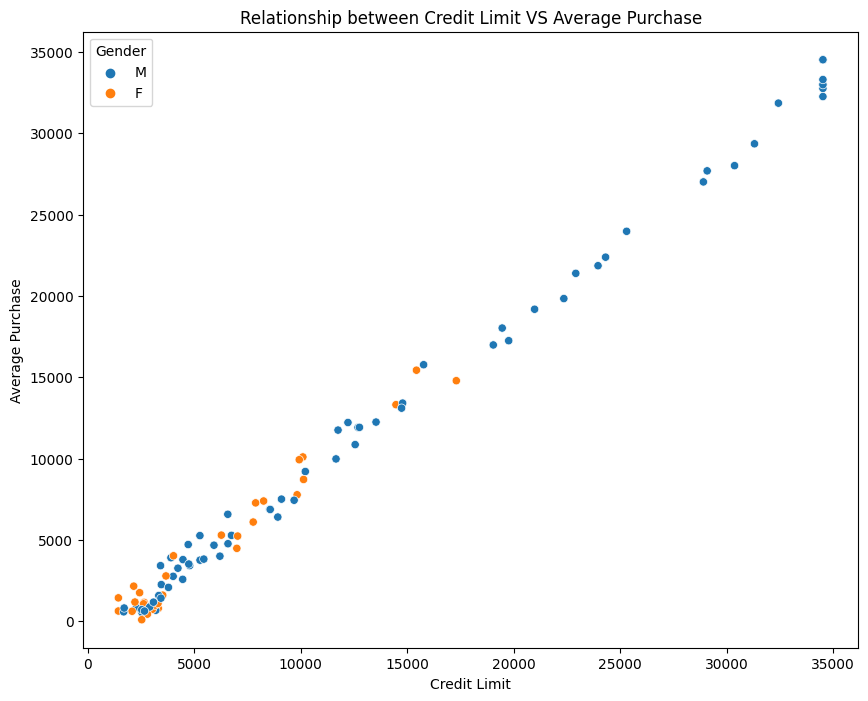

In [15]:
plt.figure(figsize=(10,8))

sns.scatterplot(x="Credit_Limit",y="Avg_Purchase",data=data,markers=True,hue=df["Gender"])
plt.xlabel("Credit Limit")
plt.ylabel("Average Purchase")
plt.title("Relationship between Credit Limit VS Average Purchase")
plt.show()

Totally linear graph, We can conclude that these two columns are highly correlated.

---
## Visualise the distribution of values for credit card limit and average purchase made on the card. Also, identify the outliers in the data, if any. 

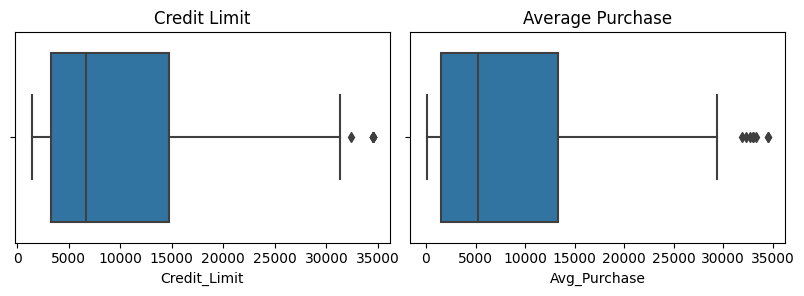

In [25]:
plt.figure(figsize=(12,8))

plt.subplot(3,3,1)
sns.boxplot(x=data["Credit_Limit"])
plt.title("Credit Limit")

plt.subplot(3,3,2)
sns.boxplot(x=data["Avg_Purchase"])
plt.title("Average Purchase")

plt.tight_layout()
plt.show()

---
## Provide a visual representation of the number of customers in each income group using a bar chart.

In [27]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816


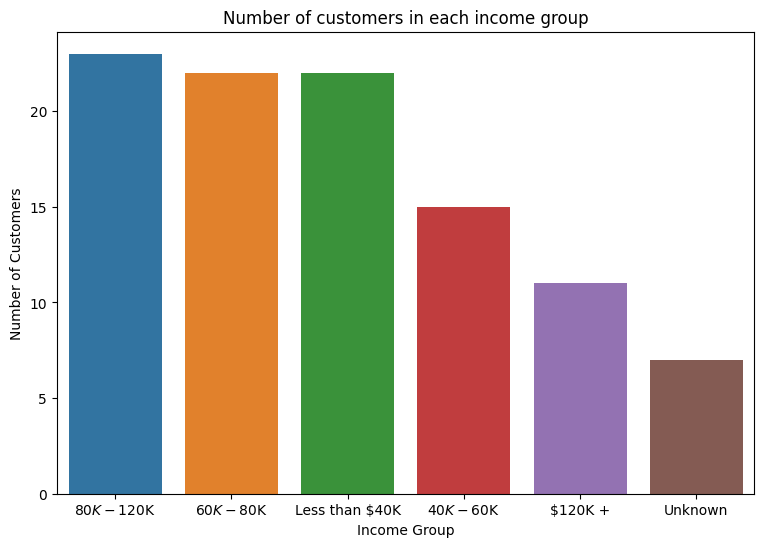

In [ ]:
x = df["Income_Category"].value_counts().reset_index()

plt.figure(figsize=(9,6))
sns.barplot(x="Income_Category",y="count",data=x)
plt.xlabel("Income Group")
plt.ylabel("Number of Customers")
plt.title("Number of customers in each income group")
plt.show()

---
## Plot the frequency distribution of the total transaction amount.

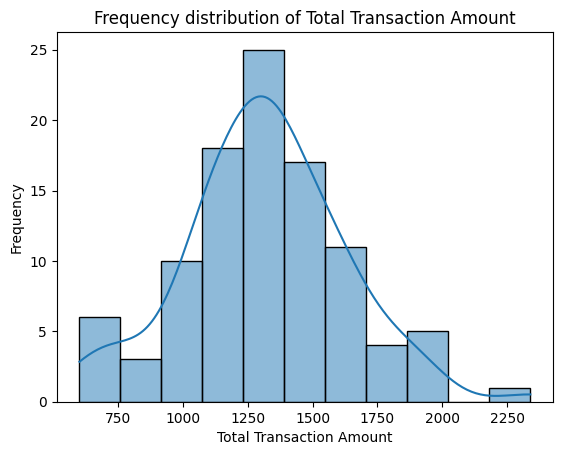

In [39]:
sns.histplot(x=df["Total_Trans_Amt"],kde=True)
plt.xlabel("Total Transaction Amount")
plt.ylabel("Frequency")
plt.title("Frequency distribution of Total Transaction Amount")
plt.show()

---
## Graphically represent the percentage of customers retained and those attrited. Highlight the latter by slicing it apart from the main pie.

In [44]:
z = df["Attrition_Flag"].value_counts().reset_index()
z

,Attrition_Flag,count
0,Existing Customer,93
1,Attrited Customer,7


([<matplotlib.patches.Wedge at 0x1ce460e9650>,
 [Text(-1.0735084435245696, 0.23995754141400938, 'Existing Customer'),
  Text(1.3662834807251394, -0.30540047527402087, 'Attrited Customer')],
 [Text(-0.5855500601043107, 0.13088593168036874, '93%'),
  Text(0.8783250947518754, -0.1963288769618705, '7%')])

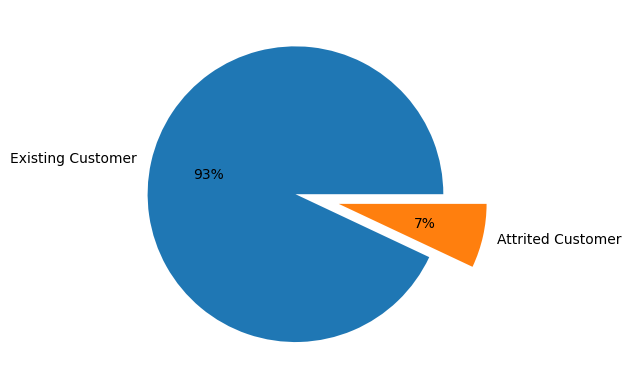

In [54]:
plt.pie(x=z["count"],labels=z["Attrition_Flag"],explode=[0,0.3],autopct="%1.0f%%")